In [1]:
import pandas as pd
import sys
from scipy.stats import ks_2samp

#first_file = sys.argv[1]
#second_file = sys.argv[2]

def corr(first_file, second_file):
    # assuming first column is `class_name_id`
    first_df = pd.read_csv(first_file, index_col=0)
    second_df = pd.read_csv(second_file, index_col=0)
    class_names = ['scalar_coupling_constant']

    for class_name in class_names:
        # all correlations
        print('\n Class: %s' % class_name)
        print(' Pearson\'s correlation score: %0.6f' %
              first_df[class_name].corr(
                  second_df[class_name], method='pearson'))
        print(' Kendall\'s correlation score: %0.6f' %
              first_df[class_name].corr(
                  second_df[class_name], method='kendall'))
        print(' Spearman\'s correlation score: %0.6f' %
              first_df[class_name].corr(
                  second_df[class_name], method='spearman'))
        ks_stat, p_value = ks_2samp(first_df[class_name].values,
                                    second_df[class_name].values)
        print(' Kolmogorov-Smirnov test:    KS-stat = %.6f    p-value = %.3e\n'
              % (ks_stat, p_value))

#corr(first_file, second_file)

In [2]:
lgbm_best = pd.read_csv("../data/output/sub_2019-08-25_19-59-34_-1.694.csv")
#kernel_nn_best = pd.read_csv("../data/output/kernel_nn_best.csv")
nn_best = pd.read_csv("../data/output/nn_sub_2.csv") # cv -1.75
kernel_mpnn = pd.read_csv("../data/output/kernel_mpnn.csv")
schnet_best = pd.read_csv("../data/output/schnet_best.csv")
kernel_diayn = pd.read_csv("../data/output/kernel_diayn.csv")
#kernel_schnet = pd.read_csv("../data/output/kernel_schnet.csv")

In [3]:
total = pd.DataFrame()
total["lgbm_best"] = lgbm_best["scalar_coupling_constant"] # all feature, val -1.68, lb -1.77
#total["kernel_nn_best"] = kernel_nn_best["scalar_coupling_constant"] # dist feature nn, cv -1.70, lb -1.68
total["nn_best"] = nn_best["scalar_coupling_constant"] # acsf and dist feature, cv -1.75
total["kernel_mpnn"] = kernel_mpnn["scalar_coupling_constant"] # lb -1.28
total["kernel_diayn"] = kernel_diayn["scalar_coupling_constant"] # lb -1.48
# total["kernel_schnet"] = kernel_schnet["scalar_coupling_constant"] # lb -1.32
total["schnet_best"] = schnet_best["scalar_coupling_constant"] # cv -1.35

In [4]:
import seaborn as sns

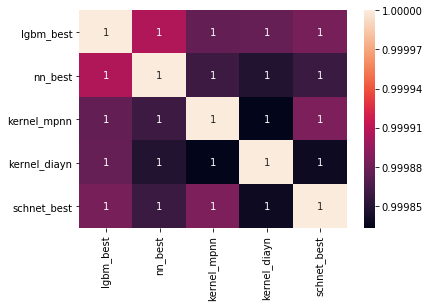

In [5]:
sns.heatmap(total.corr(), annot=True)

In [9]:
total["sub"] = 0.35 * total["lgbm_best"] + 0.4 * total["nn_best"] + 0.1 * total["kernel_diayn"] + 0.075 * total["kernel_mpnn"] + 0.075 * total["schnet_best"]

In [10]:
total.head(100)

,lgbm_best,nn_best,kernel_mpnn,kernel_diayn,schnet_best,sub
0,15.984929,-3.733082,19.242008,24.126003,44.753227,11.313736
1,193.552870,151.267105,186.417656,139.170975,187.187320,170.187817
2,9.666247,4.445458,14.021063,9.896583,3.590468,7.471893
3,192.994559,151.267105,186.417664,139.170975,187.187320,169.992409
4,15.649306,-3.733082,19.242008,24.126003,44.753227,11.196267
5,89.717194,88.369583,91.277396,92.646301,90.929690,89.679013
6,2.096379,2.344817,2.163452,2.797993,2.346448,2.289701
7,-7.631462,-8.119737,-7.642238,-7.558826,-7.683194,-7.824196
8,-9.696206,-9.922221,-9.627069,-9.637208,-9.780015,-9.781813
9,89.719934,88.371796,91.277786,92.661949,90.935210,89.682865


In [11]:
import feather
sub = feather.read_dataframe('../data/input/sample_submission.feather')
sub['scalar_coupling_constant'] = total["sub"]
sub.to_csv('../data/output/sub_blend_0.35_0.4_0.1_0.1_75_75.csv', index=False)

In [12]:
sub.head()

,id,scalar_coupling_constant
0,4658147,11.313736
1,4658148,170.187817
2,4658149,7.471893
3,4658150,169.992409
4,4658151,11.196267
